# Analysis - exp55-58

- DQN runs for NBDTrev1.

In [147]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

def load_eval(path, name="self", run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "eval_{}_{}_monitor.csv".format(name, int(r)))
        try:
            mon = load_monitored(file)
            for k,v in mon.items():
                mon[k] = [v[-1]] # Drop all but the final value
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

## Learning data

In [148]:
path = "/Users/qualia/Code/azad/data/wythoff/exp55/"
exp_55 = load_data(path, run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp56/"
exp_56 = load_data(path, run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp57/"
exp_57 = load_data(path, run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp58/"
exp_58 = load_data(path, run_index=(2, 21))

In [149]:
print(len(exp_55))
print(len(exp_56))
print(len(exp_57))
print(len(exp_58))

20
20
20
20


In [150]:
pprint(exp_55[0].keys())

dict_keys(['file', 'Q', 'advantage', 'episode', 'epsilon_e', 'loss', 'prediction_error', 'score'])


## Eval performance

In [151]:
path = "/Users/qualia/Code/azad/data/wythoff/exp55/"
self_55 = load_eval(path, name="self", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp56/"
self_56 = load_eval(path, name="self", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp57/"
self_57 = load_eval(path, name="self", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp58/"
self_58 = load_eval(path, name="self", run_index=(2, 21))

In [152]:
print(len(self_55))
print(len(self_56))
print(len(self_57))
print(len(self_58))

20
20
20
20


In [153]:
pprint(self_55[0].keys())
pprint(self_55[0])

dict_keys(['file', 'episode', 'total_reward'])
defaultdict(<class 'list'>,
            {'episode': [100.0],
             'file': ['eval_self_2_monitor'],
             'total_reward': [46.0]})


In [154]:
path = "/Users/qualia/Code/azad/data/wythoff/exp55/"
random_55 = load_eval(path, name="random", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp56/"
random_56 = load_eval(path, name="random", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp57/"
random_57 = load_eval(path, name="random", run_index=(2, 21))
path = "/Users/qualia/Code/azad/data/wythoff/exp58/"
random_58 = load_eval(path, name="random", run_index=(2, 21))

In [155]:
print(len(random_55))
print(len(random_56))
print(len(random_57))
print(len(random_58))

20
20
20
20


In [156]:
pprint(random_55[0].keys())
pprint(random_55[0])

dict_keys(['file', 'episode', 'total_reward'])
defaultdict(<class 'list'>,
            {'episode': [100.0],
             'file': ['eval_random_2_monitor'],
             'total_reward': [89.0]})


# Plots

## Score

I ran a couple candidate parameters/networks. The best of the worst is?

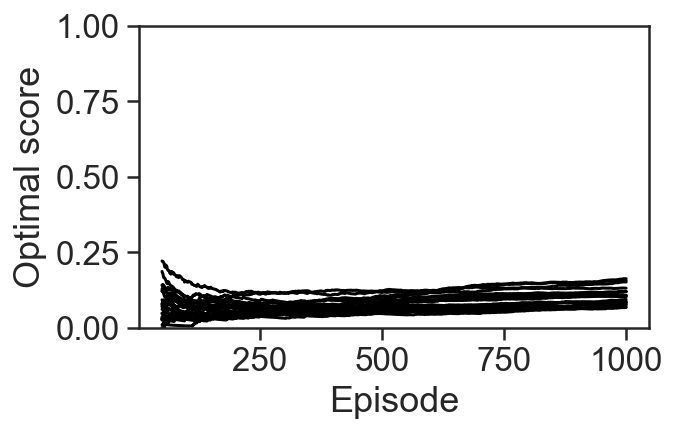

In [62]:
plt.figure(figsize=(5, 3))

for r, mon in enumerate(exp_55):
    _ = plt.plot(mon['episode'], mon['score'], color='black')
    _ = plt.ylim(0, 1)
    _ = plt.ylabel("Optimal score")
    _ = plt.tight_layout()
                                    
_ = plt.xlabel("Episode")

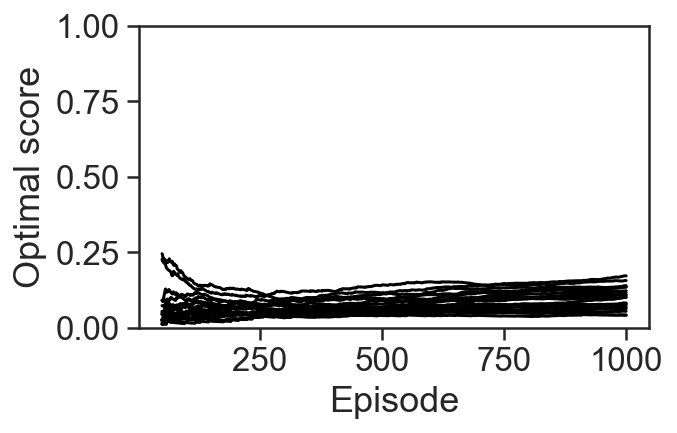

In [55]:
plt.figure(figsize=(5, 3))
for r, mon in enumerate(exp_56):
    _ = plt.plot(mon['episode'], mon['score'], color='black')
    _ = plt.ylim(0, 1)
    _ = plt.ylabel("Optimal score")
    _ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

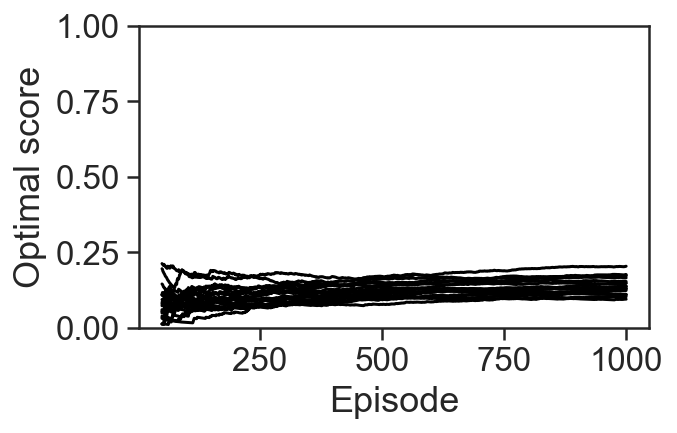

In [57]:
plt.figure(figsize=(5, 3))
for r, mon in enumerate(exp_57):
    _ = plt.plot(mon['episode'], mon['score'], color='black')
    _ = plt.ylim(0, 1)
    _ = plt.ylabel("Optimal score")
    _ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

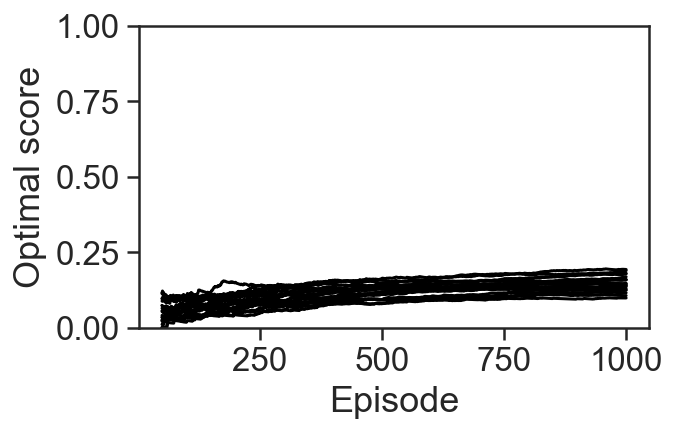

In [59]:
plt.figure(figsize=(5, 3))
for r, mon in enumerate(exp_58):
    _ = plt.plot(mon['episode'], mon['score'], color='black')
    _ = plt.ylim(0, 1)
    _ = plt.ylabel("Optimal score")
    _ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

- 56 and 58 used annealing. Performance looks slightly better. Focusing on these two.

## Summarize 

In [125]:
key = 'Q'
episode_55, exp_55_avg, exp_55_sem = score_summary(exp_55, key=key)
episode_56, exp_56_avg, exp_56_sem = score_summary(exp_56, key=key)
episode_57, exp_57_avg, exp_57_sem = score_summary(exp_57, key=key)
episode_58, exp_58_avg, exp_58_sem = score_summary(exp_58, key=key)

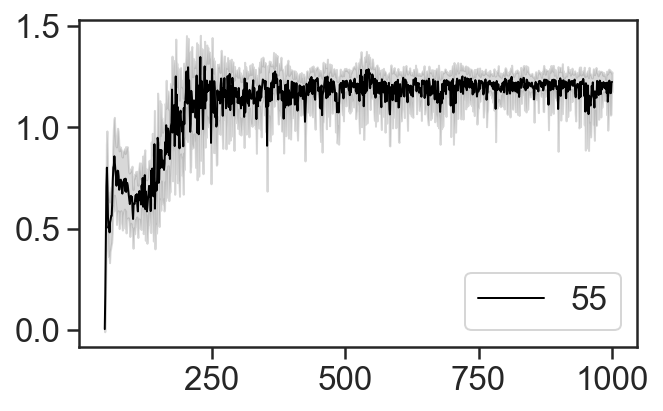

In [126]:
plt.figure(figsize=(5, 3))
_ = plt.plot(episode_55, exp_55_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="55")
_ = plt.fill_between(episode_55, 
                       exp_55_avg + 2*exp_55_sem, 
                       exp_55_avg - 2*exp_55_sem,
                       color='grey', alpha=0.3)
plt.legend()

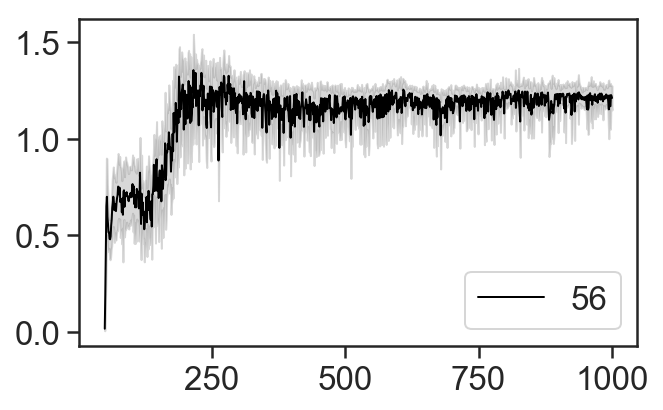

In [127]:
plt.figure(figsize=(5, 3))
_ = plt.plot(episode_56, exp_56_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="56")
_ = plt.fill_between(episode_56, 
                       exp_56_avg + 2*exp_56_sem, 
                       exp_56_avg - 2*exp_56_sem,
                       color='grey', alpha=0.3)
plt.legend()

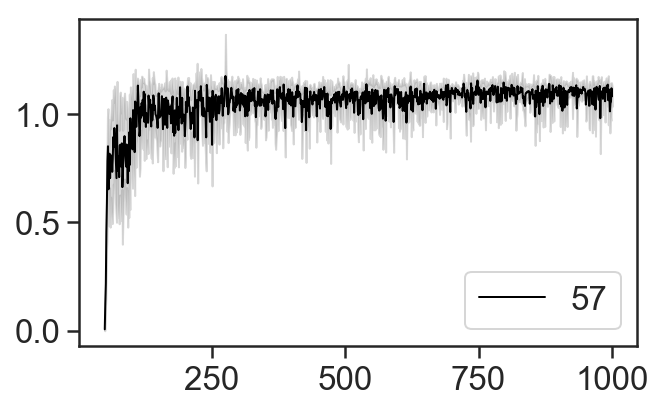

In [128]:
plt.figure(figsize=(5, 3))
_ = plt.plot(episode_57, exp_57_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="57")
_ = plt.fill_between(episode_57, 
                       exp_57_avg + 2*exp_57_sem, 
                       exp_57_avg - 2*exp_57_sem,
                       color='grey', alpha=0.3)
plt.legend()

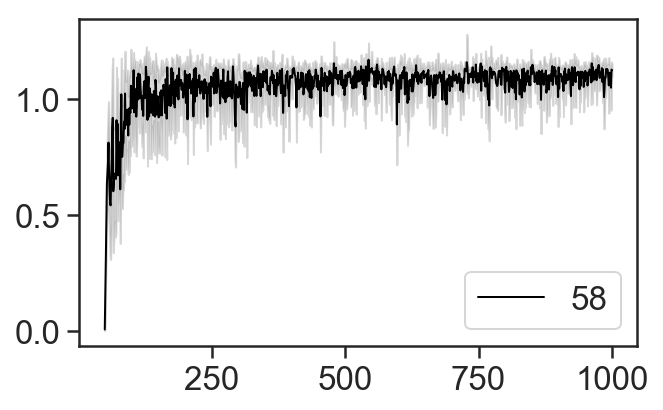

In [129]:
plt.figure(figsize=(5, 3))
_ = plt.plot(episode_58, exp_58_avg, linestyle="-", color='black', alpha=1.0, linewidth=1, label="58")
_ = plt.fill_between(episode_58, 
                       exp_58_avg + 2*exp_58_sem, 
                       exp_58_avg - 2*exp_58_sem,
                       color='grey', alpha=0.3)
plt.legend()

# Eval performance
## Summary

In [161]:
key = 'total_reward'
episode_55, self_55_avg, self_55_sem = score_summary(self_55, key=key)
episode_56, self_56_avg, self_56_sem = score_summary(self_56, key=key)
episode_57, self_57_avg, self_57_sem = score_summary(self_57, key=key)
episode_58, self_58_avg, self_58_sem = score_summary(self_58, key=key)

In [165]:
episode_55, random_55_avg, random_55_sem = score_summary(random_55, key=key)
episode_56, random_56_avg, random_56_sem = score_summary(random_56, key=key)
episode_57, random_57_avg, random_57_sem = score_summary(random_57, key=key)
episode_58, random_58_avg, random_58_sem = score_summary(random_58, key=key)